In [20]:
from utils import create_data_on_disk, save_to_pickle, read_from_pickle, generate_data_onfly, get_results, FastTensorDataLoader

In [3]:
graph_size = 10
num_samples = 5

In [4]:
data_set = create_data_on_disk(graph_size, num_samples, filename='test_file', is_return=True)

In [5]:
data_set

(tensor([[0.0290, 0.4019],
         [0.2598, 0.3666],
         [0.0583, 0.7006],
         [0.0518, 0.4681],
         [0.6738, 0.3315]]),
 tensor([[[0.0290, 0.4019],
          [0.2598, 0.3666],
          [0.0583, 0.7006],
          [0.0518, 0.4681],
          [0.6738, 0.3315],
          [0.7837, 0.5631],
          [0.7749, 0.8208],
          [0.2793, 0.6817],
          [0.2837, 0.6567],
          [0.2388, 0.7313]],
 
         [[0.6012, 0.3043],
          [0.2548, 0.6294],
          [0.9665, 0.7399],
          [0.4517, 0.4757],
          [0.7842, 0.1525],
          [0.6662, 0.3343],
          [0.7893, 0.3216],
          [0.5247, 0.6688],
          [0.8436, 0.4265],
          [0.9561, 0.0770]],
 
         [[0.4108, 0.0014],
          [0.5414, 0.6419],
          [0.2976, 0.7077],
          [0.4189, 0.0655],
          [0.8839, 0.8083],
          [0.7528, 0.8988],
          [0.6839, 0.7658],
          [0.9149, 0.3993],
          [0.1100, 0.2541],
          [0.4333, 0.4451]],
 
         [[0.4

In [14]:
!ls | grep Validation

Validation_dataset_test_file.pkl


In [6]:
data_set_from_file = read_from_pickle('Validation_dataset_test_file.pkl', num_samples=3)

In [7]:
data_set_from_file

(tensor([[0.0290, 0.4019],
         [0.2598, 0.3666],
         [0.0583, 0.7006]]),
 tensor([[[0.0290, 0.4019],
          [0.2598, 0.3666],
          [0.0583, 0.7006],
          [0.0518, 0.4681],
          [0.6738, 0.3315],
          [0.7837, 0.5631],
          [0.7749, 0.8208],
          [0.2793, 0.6817],
          [0.2837, 0.6567],
          [0.2388, 0.7313]],
 
         [[0.6012, 0.3043],
          [0.2548, 0.6294],
          [0.9665, 0.7399],
          [0.4517, 0.4757],
          [0.7842, 0.1525],
          [0.6662, 0.3343],
          [0.7893, 0.3216],
          [0.5247, 0.6688],
          [0.8436, 0.4265],
          [0.9561, 0.0770]],
 
         [[0.4108, 0.0014],
          [0.5414, 0.6419],
          [0.2976, 0.7077],
          [0.4189, 0.0655],
          [0.8839, 0.8083],
          [0.7528, 0.8988],
          [0.6839, 0.7658],
          [0.9149, 0.3993],
          [0.1100, 0.2541],
          [0.4333, 0.4451]]]),
 tensor([[0.3500, 0.2000, 0.2000, 0.1500, 0.4500, 0.4000, 0.3500, 0.

In [8]:
data_set_from_file[0].shape, data_set_from_file[1].shape, data_set_from_file[2].shape

(torch.Size([3, 2]), torch.Size([3, 10, 2]), torch.Size([3, 10]))

In [10]:
data_on_fly = generate_data_onfly(num_samples, graph_size)

In [11]:
data_on_fly

(tensor([[0.7528, 0.8988],
         [0.6839, 0.7658],
         [0.9149, 0.3993],
         [0.1100, 0.2541],
         [0.4333, 0.4451]]),
 tensor([[[0.4966, 0.7865],
          [0.6604, 0.1303],
          [0.3498, 0.3824],
          [0.8043, 0.3186],
          [0.2908, 0.4196],
          [0.3728, 0.3769],
          [0.0108, 0.9455],
          [0.7661, 0.2634],
          [0.1880, 0.5174],
          [0.7849, 0.1412]],
 
         [[0.3112, 0.7091],
          [0.1775, 0.4443],
          [0.1230, 0.9638],
          [0.7695, 0.0378],
          [0.2239, 0.6772],
          [0.5274, 0.6325],
          [0.0910, 0.2323],
          [0.7269, 0.1187],
          [0.3951, 0.7199],
          [0.7595, 0.5311]],
 
         [[0.6449, 0.7224],
          [0.4416, 0.3634],
          [0.8818, 0.9874],
          [0.7316, 0.2814],
          [0.0651, 0.0065],
          [0.5035, 0.3082],
          [0.3742, 0.4297],
          [0.9729, 0.9739],
          [0.4533, 0.3499],
          [0.7428, 0.4601]],
 
         [[0.0

In [15]:
import torch

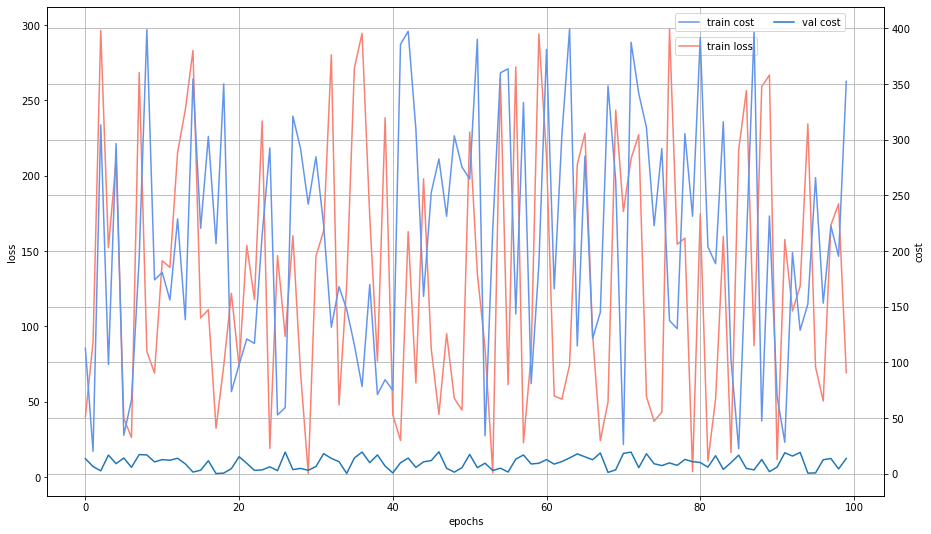

In [19]:
epochs = 100
train_loss_results = torch.rand(epochs) * 300
valid_loss_results = torch.rand(epochs) * 400
val_cost = torch.rand(epochs) * 20
get_results(train_loss_results, valid_loss_results, val_cost)

In [21]:
depo, graphs, demand = data_set
data_loader = FastTensorDataLoader(depo, graphs, demand, batch_size=2)

In [22]:
for s_depo, s_graphs, s_demand in data_loader:
    print(s_depo, s_graphs, s_demand)

tensor([[0.0290, 0.4019],
        [0.2598, 0.3666]]) tensor([[[0.0290, 0.4019],
         [0.2598, 0.3666],
         [0.0583, 0.7006],
         [0.0518, 0.4681],
         [0.6738, 0.3315],
         [0.7837, 0.5631],
         [0.7749, 0.8208],
         [0.2793, 0.6817],
         [0.2837, 0.6567],
         [0.2388, 0.7313]],

        [[0.6012, 0.3043],
         [0.2548, 0.6294],
         [0.9665, 0.7399],
         [0.4517, 0.4757],
         [0.7842, 0.1525],
         [0.6662, 0.3343],
         [0.7893, 0.3216],
         [0.5247, 0.6688],
         [0.8436, 0.4265],
         [0.9561, 0.0770]]]) tensor([[0.3500, 0.2000, 0.2000, 0.1500, 0.4500, 0.4000, 0.3500, 0.3500, 0.4000,
         0.2000],
        [0.2000, 0.1000, 0.4000, 0.2500, 0.0500, 0.3500, 0.3500, 0.3500, 0.0500,
         0.2000]])
tensor([[0.0583, 0.7006],
        [0.0518, 0.4681]]) tensor([[[0.4108, 0.0014],
         [0.5414, 0.6419],
         [0.2976, 0.7077],
         [0.4189, 0.0655],
         [0.8839, 0.8083],
         [0.7528